In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [140]:
ALPHA = 0.5
GAMMA = 1
EPSILON = 0.4
EPISODES = 1000
LIVING_PENALITY = 1

In [141]:
bot_icon = '🤖'


def create_grid() -> tuple[list[list[str]], tuple[int, int]]:
    return [
        [bot_icon, ' ', ' ', ' '],
        [' ', 'o', ' ', 'o'],
        [' ', ' ', ' ', 'o'],
        ['o', ' ', ' ', 'x'],
    ], (0, 0)


def step(grid: list[list[str]], action: int) -> tuple[list[list[str]], tuple[int, int], float, bool]:
    """
    Simulate a step in the environment.

    Args:
        grid: The current grid.
        action: The action to take. 0 = up, 1 = right, 2 = down, 3 = left.

    Returns:
        The new grid, state, the reward, ?terminated.
    """
    # Find the bot
    bot = None
    for i, row in enumerate(grid):
        for j, cell in enumerate(row):
            if cell == bot_icon:
                bot = (i, j)
                break
        if bot is not None:
            break
    
    # Map intended action to possible actions (straight, left, right)
    action_map = {
        0: [0, 3, 1],  # UP:    [UP, LEFT, RIGHT]
        1: [1, 0, 2],  # RIGHT: [RIGHT, UP, DOWN]
        2: [2, 1, 3],  # DOWN:  [DOWN, RIGHT, LEFT]
        3: [3, 2, 0]   # LEFT:  [LEFT, DOWN, UP]
    }
    
    # Randomly select actual action with equal probability
    actual_action = np.random.choice(action_map[action])
    
    # Execute selected action
    i, j = bot
    if actual_action == 0:  # up
        if i == 0:
            return grid, (i, j), 0, False
        i -= 1
    elif actual_action == 1:  # right
        if j == len(grid[0]) - 1:
            return grid, (i, j), 0, False
        j += 1
    elif actual_action == 2:  # down
        if i == len(grid) - 1:
            return grid, (i, j), 0, False
        i += 1
    elif actual_action == 3:  # left
        if j == 0:
            return grid, (i, j), 0, False
        j -= 1

    # Check if the bot is on a wall
    if grid[i][j] == 'o':
        return grid, (i, j), -100, True

    # Check if the bot is on the goal
    if grid[i][j] == 'x':
        return grid, (i, j), 100, True

    # Move the bot
    grid[bot[0]][bot[1]] = ' '
    grid[i][j] = bot_icon

    return grid, (i, j), 0, False

In [142]:
n_rows = 4
n_cols = 4
n_actions = 4

q_table = np.zeros([n_rows, n_cols, n_actions])

In [143]:
def get_action(state: tuple[int, int], epsilon=EPSILON):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(q_table[state])

In [149]:
EPISODES = 1000
for episode in range(EPISODES):
    grid, state = create_grid()
    
    while True:
        action = get_action(state)
        new_grid, new_state, reward, done = step(grid, action)
        
        reward -= 2
        
        curr_q = q_table[state][action]
        q_table[state][action] = curr_q + ALPHA * (reward + GAMMA * np.max(q_table[new_state]) - curr_q)
        
        state = new_state

        if done:
            break

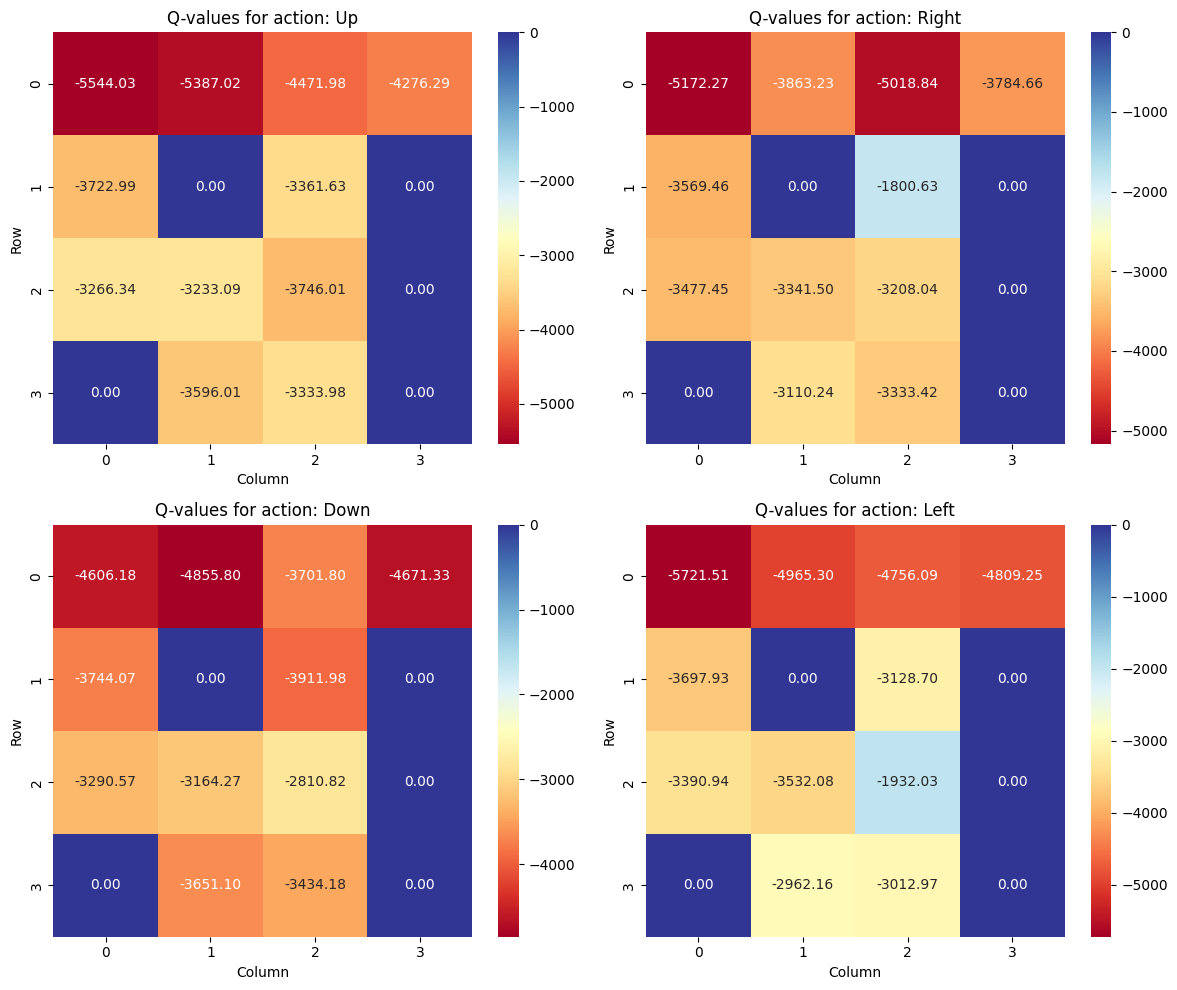

In [167]:
def reshape_q_table(Q_table, nrows=4, ncols=4):
    """Convert Q-table from (observation, action) to (row, col, action) format"""
    n_actions = Q_table.shape[1]
    reshaped_q = np.zeros((nrows, ncols, n_actions))
    
    for obs in range(nrows * ncols):
        row = obs // ncols  # Integer division to get row
        col = obs % ncols   # Remainder to get column
        reshaped_q[row, col] = Q_table[obs]
    
    return reshaped_q

q_table = reshape_q_table(np.load('./q_table.npy'))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
actions = ['Up', 'Right', 'Down', 'Left']

for i, ax in enumerate(axes.flat):
    sns.heatmap(q_table[:, :, i], annot=True, fmt='.2f', cmap='RdYlBu', ax=ax)
    ax.set_title(f'Q-values for action: {actions[i]}')
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')

plt.tight_layout()
plt.show()

In [151]:
grid, state = create_grid()
R = 0

act_dict = {
    0: 'up',
    1: 'right',
    2: 'down',
    3: 'left'
}

while True:
    action = get_action(state, epsilon=0)
    grid, state, reward, done = step(grid, action)
    R += reward

    print(f'action: {act_dict[action]}, state: {state}, reward: {reward}')
    for row in grid:
        print(row)

    if done:
        break

action: left, state: (0, 0), reward: 0
['🤖', ' ', ' ', ' ']
[' ', 'o', ' ', 'o']
[' ', ' ', ' ', 'o']
['o', ' ', ' ', 'x']
action: left, state: (0, 0), reward: 0
['🤖', ' ', ' ', ' ']
[' ', 'o', ' ', 'o']
[' ', ' ', ' ', 'o']
['o', ' ', ' ', 'x']
action: left, state: (0, 0), reward: 0
['🤖', ' ', ' ', ' ']
[' ', 'o', ' ', 'o']
[' ', ' ', ' ', 'o']
['o', ' ', ' ', 'x']
action: left, state: (1, 0), reward: 0
[' ', ' ', ' ', ' ']
['🤖', 'o', ' ', 'o']
[' ', ' ', ' ', 'o']
['o', ' ', ' ', 'x']
action: left, state: (1, 0), reward: 0
[' ', ' ', ' ', ' ']
['🤖', 'o', ' ', 'o']
[' ', ' ', ' ', 'o']
['o', ' ', ' ', 'x']
action: left, state: (0, 0), reward: 0
['🤖', ' ', ' ', ' ']
[' ', 'o', ' ', 'o']
[' ', ' ', ' ', 'o']
['o', ' ', ' ', 'x']
action: left, state: (0, 0), reward: 0
['🤖', ' ', ' ', ' ']
[' ', 'o', ' ', 'o']
[' ', ' ', ' ', 'o']
['o', ' ', ' ', 'x']
action: left, state: (0, 0), reward: 0
['🤖', ' ', ' ', ' ']
[' ', 'o', ' ', 'o']
[' ', ' ', ' ', 'o']
['o', ' ', ' ', 'x']
action: left, st